In [1]:
%%capture
!pip install --user numpy pandas scikit-learn matplotlib;

### Importing packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt

### Loading data

In [3]:
X_columns = ['Pregnancy', 'Glucose', 'Blood Pressure', 'Skin thickness', 'Insulin', 'BMI', 'Inheritance', 'Age']
y_column = 'Has Diabetes'
data = pd.read_csv('data.csv', names=[*X_columns, y_column])
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
data.describe()

,Pregnancy,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Inheritance,Age,Has Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

X_scaled = MinMaxScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [5]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_scaled, y)
y_pred_knn = knn.predict(X_test)

### Niave Bayes

In [6]:
from sklearn.naive_bayes import CategoricalNB

def transform_to_bins(col):
    percentiles = [25, 50, 75]
    boundaries = np.percentile(col, percentiles)
    categories = np.array([0, 1, 2, 3])
    return np.digitize(col, boundaries, right=True)

In [7]:
X_nb = X.copy(deep = True)

for column in X_columns:
    col = np.array(X_nb[column])
    X_nb[column] = transform_to_bins(col)

X_nb.describe()

,Pregnancy,Glucose,Blood Pressure,Skin thickness,Insulin,BMI,Inheritance,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.347656,1.484375,1.417969,1.429688,1.263021,1.489583,1.500000,1.423177
std,1.144214,1.124466,1.084940,1.152178,1.292275,1.116381,1.118763,1.124266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.500000,1.000000
75%,2.000000,2.250000,2.000000,2.000000,2.250000,2.000000,2.250000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [8]:
X_nb_train, X_nb_test, _, _ = train_test_split(X_nb, y, test_size=0.2)

In [9]:
clf = CategoricalNB(force_alpha=True, min_categories=4)
clf.fit(X_nb_train, y_train)
y_pred_naive_bayes = clf.predict(X_nb_test)

### Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

X_lr = X.copy(deep = True)
X_lr_train, X_lr_test, _, _ = train_test_split(X_nb, y, test_size=0.2)

logreg_model = LogisticRegression()

logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

## Evaluation of models

In [11]:
def display_model_evaluation(y_true, y_pred, model_name=""):
    print (f'Accuracy score is {accuracy_score(y_test, y_pred)}')
    cm = confusion_matrix(y_true, y_pred)
    print (f'F1 score is {f1_score(y_test, y_pred)}')
    print ('Confusion Matrix')
    ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

### KNN

Accuracy score is 0.8181818181818182
F1 score is 0.611111111111111
Confusion Matrix


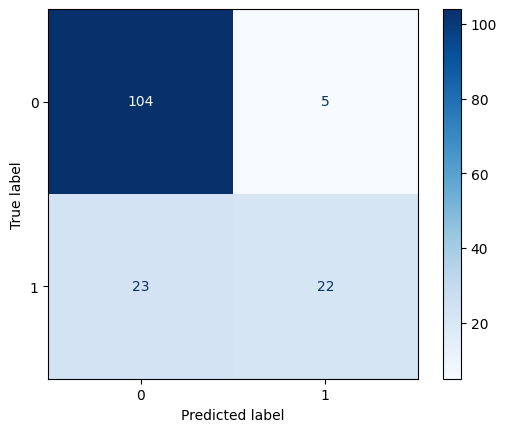

In [12]:
display_model_evaluation(y_test, y_pred_knn)

### Naive Bayes

Accuracy score is 0.6753246753246753
F1 score is 0.07407407407407407
Confusion Matrix


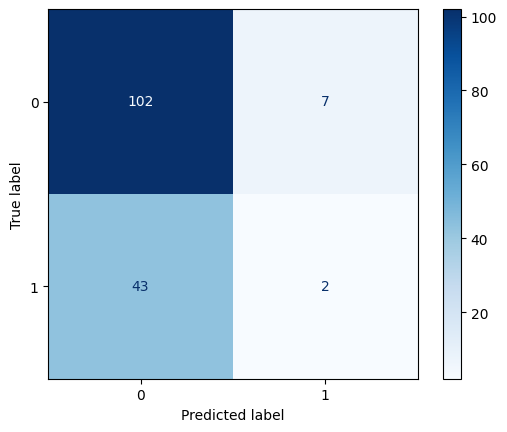

In [13]:
display_model_evaluation(y_test, y_pred_naive_bayes)

### Logistic regression

Accuracy score is 0.8181818181818182
F1 score is 0.6410256410256411
Confusion Matrix


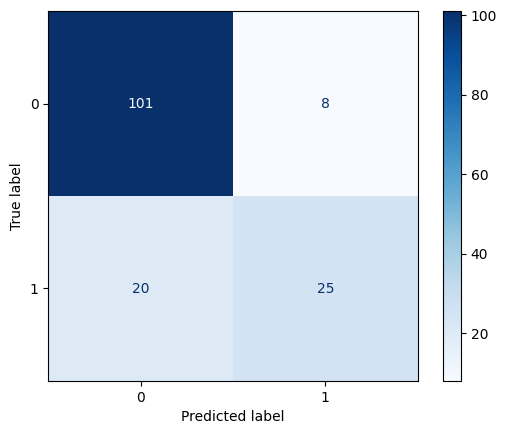

In [14]:
display_model_evaluation(y_test, y_pred_logreg)